# Assignment - 05  (Learning to Bend a Model)

Step 1 — Create a Simple Dataset

In [ ]:
# Task 1.1 — Input generation
import numpy as np
X=np.linspace(0,10,50).reshape(-1,1)

print(X)
print(X.shape)
print(X.min())
print(X.max())

[[ 0.        ]
 [ 0.20408163]
 [ 0.40816327]
 [ 0.6122449 ]
 [ 0.81632653]
 [ 1.02040816]
 [ 1.2244898 ]
 [ 1.42857143]
 [ 1.63265306]
 [ 1.83673469]
 [ 2.04081633]
 [ 2.24489796]
 [ 2.44897959]
 [ 2.65306122]
 [ 2.85714286]
 [ 3.06122449]
 [ 3.26530612]
 [ 3.46938776]
 [ 3.67346939]
 [ 3.87755102]
 [ 4.08163265]
 [ 4.28571429]
 [ 4.48979592]
 [ 4.69387755]
 [ 4.89795918]
 [ 5.10204082]
 [ 5.30612245]
 [ 5.51020408]
 [ 5.71428571]
 [ 5.91836735]
 [ 6.12244898]
 [ 6.32653061]
 [ 6.53061224]
 [ 6.73469388]
 [ 6.93877551]
 [ 7.14285714]
 [ 7.34693878]
 [ 7.55102041]
 [ 7.75510204]
 [ 7.95918367]
 [ 8.16326531]
 [ 8.36734694]
 [ 8.57142857]
 [ 8.7755102 ]
 [ 8.97959184]
 [ 9.18367347]
 [ 9.3877551 ]
 [ 9.59183673]
 [ 9.79591837]
 [10.        ]]
(50, 1)
0.0
10.0


In [ ]:
# Task 1.2 — Target generation
np.random.seed(42)
noise=np.random.normal(0, 0.2, size=(50, 1))
y=np.log(X+1)+noise

print(y)
print(y.shape)

[[0.09934283]
 [0.15806429]
 [0.47182391]
 [0.78223353]
 [0.5499854 ]
 [0.65647216]
 [1.11537015]
 [1.04079014]
 [0.87409723]
 [1.15116564]
 [1.01944247]
 [1.08393795]
 [1.28647087]
 [0.91290946]
 [1.00494315]
 [1.28902702]
 [1.24794773]
 [1.5601009 ]
 [1.36029689]
 [1.30218251]
 [1.91876235]
 [1.6198525 ]
 [1.71639672]
 [1.45444185]
 [1.66572985]
 [1.83080779]
 [1.61132226]
 [1.94851041]
 [1.78410971]
 [1.87584106]
 [1.8429103 ]
 [2.36195773]
 [2.0162769 ]
 [1.83417372]
 [2.23626803]
 [1.85297239]
 [2.16366758]
 [1.7541166 ]
 [1.90399941]
 [2.23205136]
 [2.36289591]
 [2.27150357]
 [2.23565281]
 [2.21965956]
 [2.00483779]
 [2.17681696]
 [2.24849996]
 [2.57150803]
 [2.44789179]
 [2.04528724]]
(50, 1)


In [ ]:
#Log curve goes up fast at start, then slows down later, whereas a straight line has same slope everywhere - it can't do "fast then slow".

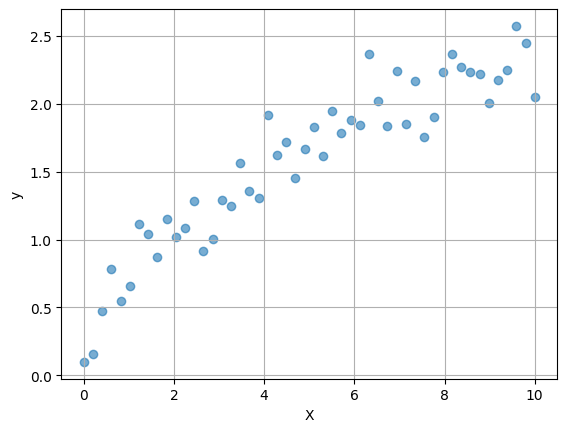

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y, alpha=0.6)
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show()

Step 2 — Decide the Model Shape (No Code Yet)

In [ ]:
# Hidden units: 3
# Why more than 1? : as more than 1 because more units give the model more ways to bend the curve.
# Why not too many?: not too many because that makes training unstable and causes overfitting.
# Our model: 1 input → 3 hidden → 1 output

Step 3 — Initialize Model Parameters

In [8]:
np.random.seed(42)

W1 = np.random.uniform(-1,1, size=(1,3))
b1 = np.zeros((1,3))
W2 = np.random.uniform(-1,1, size=(3,1))
b2 = np.zeros((1,1))

# here W1 connects the ist input to the 3 hidden units ,therefore the shape is 1,3
# b1 is the bias per hidden unit hence (1,3)
# W2 connects the 3 hidden units to the output unit, therefore the shape is 3,1
# b2 is the last one bias for output hence (1,1).

# Weights affect shape (slope and bending). Biases shift the curve up or down.

In [9]:
W1,b1

(array([[-0.25091976,  0.90142861,  0.46398788]]), array([[0., 0., 0.]]))

In [10]:
W2,b2

(array([[ 0.19731697],
        [-0.68796272],
        [-0.68801096]]),
 array([[0.]]))

Step 4 — Define an Activation Function

In [11]:
# Task 4.1 — Write the function
def activation(z):
    return np.maximum(0,z)

In [14]:
# Task 4.2 — Write its slope
def activation_slope(z):
    return (z>0).astype(float)

# slope matters because it tells how to change the parameters and in which direction the optimal parameters exist. therefore no slope=no direction =no learning

Step 5 — Forward Pass (What the Model Does)

In [15]:
# Step 1: Linear transformation (input to hidden)
z1=X@W1+b1

# Step 2: Apply activation (bend the curve)
h=activation(z1)

# Step 3: Linear transformation (hidden to output)
y_hat=h@W2+b2

In [16]:
print(f"z1 shape:{z1.shape}(before activation)")
print(f"h shape:{h.shape}(after activation)")
print(f"y_hat shape:{y_hat.shape}(final prediction)")
print(f"\nFirst 5 predictions:\n{y_hat[:5].flatten()}")

z1 shape:(50, 3)(before activation)
h shape:(50, 3)(after activation)
y_hat shape:(50, 1)(final prediction)

First 5 predictions:
[ 0.         -0.1917098  -0.3834196  -0.57512941 -0.76683921]


Step 6 — Define Error and Loss

In [17]:
# Task 6.1 — Error
error=y_hat-y

In [18]:
# Task 6.2 — Loss
loss=np.mean(error**2)

In [20]:
print(f"Error shape:{error.shape}")
print(f"First 5 errors:\n{error[:5].flatten()}")
print(f"\nLoss (MSE):{loss:.6f}")

# large errors matters because we are using mse as the loss function and it sqaure the error which leads to amplifying its magnitude and this forces the model to correct that mistakes more aggressively.

Error shape:(50, 1)
First 5 errors:
[-0.09934283 -0.34977409 -0.85524352 -1.35736293 -1.3168246 ]

Loss (MSE):50.606111


Step 7 — Why We Need Slopes (Conceptual Stop)

In [21]:
# To reduce loss, we must change parameters.
# To know how to change them, we need to know:
# if a small change increases or decreases loss.

Step 8 — Backward Flow (Skeleton Only)

In [23]:
# Task 8.1 — From loss to prediction
dL_dy=2*error/len(X)

In [24]:
dL_dy.shape

(50, 1)

In [25]:
# Task 8.2 — Gradients of output layer
dL_dW2 = h.T@dL_dy
dL_db2 = np.sum(dL_dy, axis=0, keepdims=True)

# these depend on h because W2 connects hidden to output.

In [27]:
dL_dW2.shape, dL_db2.shape

((3, 1), (1, 1))

In [28]:
# Task 8.3 — Flow into hidden layer
dL_dh = dL_dy @ W2.T
dL_dh.shape

(50, 3)

In [29]:
# Task 8.4 — Apply activation slope
dL_dz1 = dL_dh * activation_slope(z1)
dL_dz1.shape


# activation function controls error flow , if the relu is off gradient becomes 0 which means no learning there and if the relu is on then the gradient passes which means parameters are getting updated which means some learning happens.

(50, 3)

In [30]:
# Task 8.5 — Gradients of first layer
dL_dW1 = X.T @ dL_dz1
dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

Step 9 — Parameter Update Rule

In [31]:
learning_rate = 0.01
W1 = W1 - learning_rate * dL_dW1
b1 = b1 - learning_rate * dL_db1
W2 = W2 - learning_rate * dL_dW2
b2 = b2 - learning_rate * dL_db2

# Gradient tells us which way is wrong, we go the opposite way.

Step 10 — Training Loop (Big Skeleton)

In [32]:
for epoch in range(1000):
    z1 = X @ W1 + b1
    h = activation(z1)
    y_hat = h @ W2 + b2

    error = y_hat - y
    loss = np.mean(error ** 2)

    dL_dy = 2 * error / len(X)
    dL_dW2 = h.T @ dL_dy
    dL_db2 = np.sum(dL_dy, axis=0, keepdims=True)
    dL_dh = dL_dy @ W2.T
    dL_dz1 = dL_dh * activation_slope(z1)
    dL_dW1 = X.T @ dL_dz1
    dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

    W1 -= learning_rate * dL_dW1
    b1 -= learning_rate * dL_db1
    W2 -= learning_rate * dL_dW2
    b2 -= learning_rate * dL_db2

    if epoch%100==0:
        print(epoch,loss)

# Number of epochs: 1000 - enough for model to learn
# Learning rate: 0.01 - small steps keep training stable

0 2.191947721996056
100 0.06169776595988116
200 0.054462410503759245
300 0.05215422062378479
400 0.051399762330366236
500 0.05114980709993502
600 0.051066358983286
700 0.05103837696158783
800 0.05102897015631798
900 0.05102580320162165
